# Advanced Lane Line Detection

--- 

## Project Goals

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Camera Calibration With OpenCV

---

Later on in this project, I will be preforming a perspective transfom on input images. For this to work properly I need the input image to be flat. This means that I have to account for and correct the distortion that a camera lense causes.

Calibration works by taking pictures of known shapes, and calculating how they have been distorted. Typically this is achived by taking a picture of a checkerboard pattern, calculating the points of the corners touching black and white tiles (inside corners), and then calculating the distortion needed to make the points on each row and column fall on a straight line.

Since camera lenses are rigid and don't change, we can take calibration images and then used the calculated calibration in any setting.

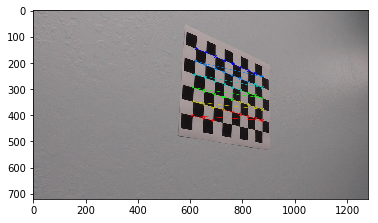

In [30]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



calibration_directory = "camera_cal/"
file_name = "calibration*.jpg"
    

def load_calibration_points():
    images = glob.glob(calibration_directory+file_name)

    image_points = []
    object_points = []
    
    nx = 9
    ny = 6

    static_object_points = np.zeros((nx*ny,3),np.float32)
    static_object_points[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    
    for fname in images:

        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

        if ret == True:
            image_points.append(corners)
            object_points.append(static_object_points)
            
            img = cv2.drawChessboardCorners(img,(8,6),corners,ret)
            plt.imshow(img)
    
    return image_points,object_points
        
def undistort_img(img,image_points,object_points):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], None, None)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    return dst

    
    
    
image_points, object_points = load_calibration_points()

    


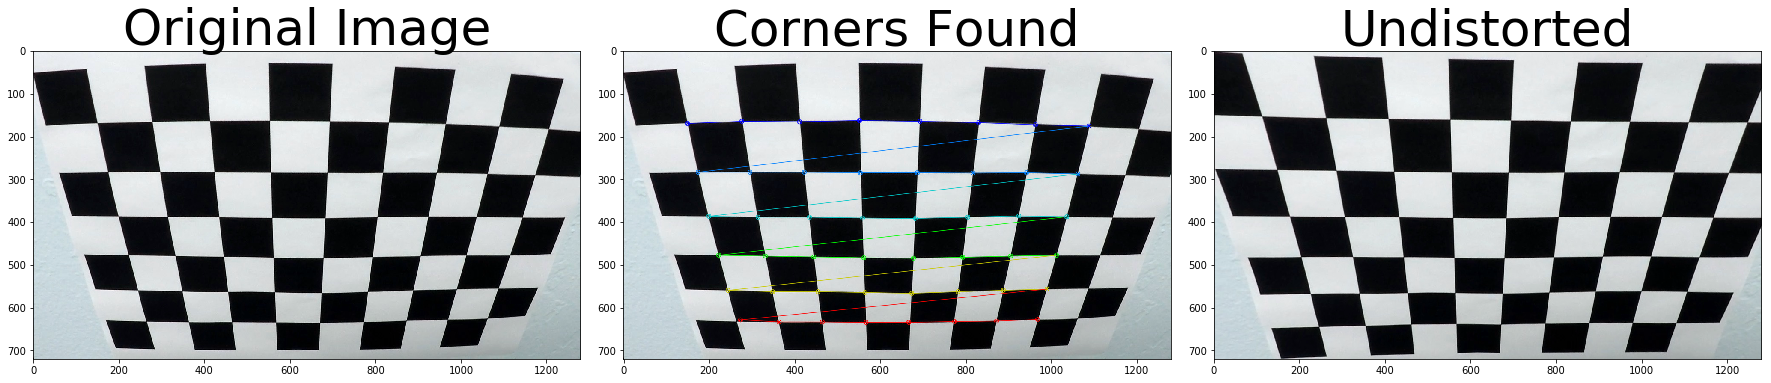

In [32]:




def show_example():
    
    
    sample_image = "calibration2.jpg"
    
    #Load Base Image
    img = cv2.imread(directory+sample_image)
    
    # Get Corners
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    corner_img = img.copy()
    cv2.drawChessboardCorners(corner_img, (nx, ny), corners, ret)
    
    # Get Undistorted Image
    undst = undistort_img(img.copy(),image_points,object_points)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(corner_img)
    ax2.set_title('Corners Found', fontsize=50)
    ax3.imshow(undst)
    ax3.set_title('Undistorted', fontsize=50)
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    
show_example()

